<a href="https://colab.research.google.com/github/alpARYA/PRODIGY_ML_02/blob/main/Customer_Segmentation_Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')



In [6]:
# Display the first few rows of the dataset to understand its structure
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


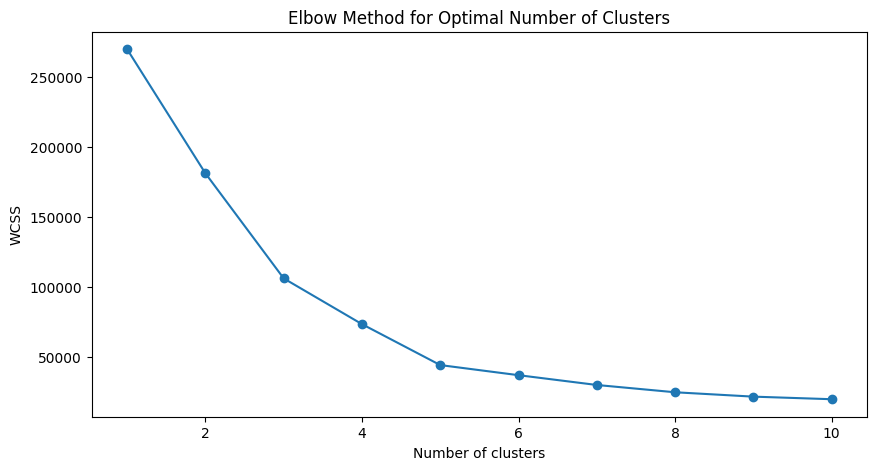

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Using the Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results to observe the "Elbow"
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


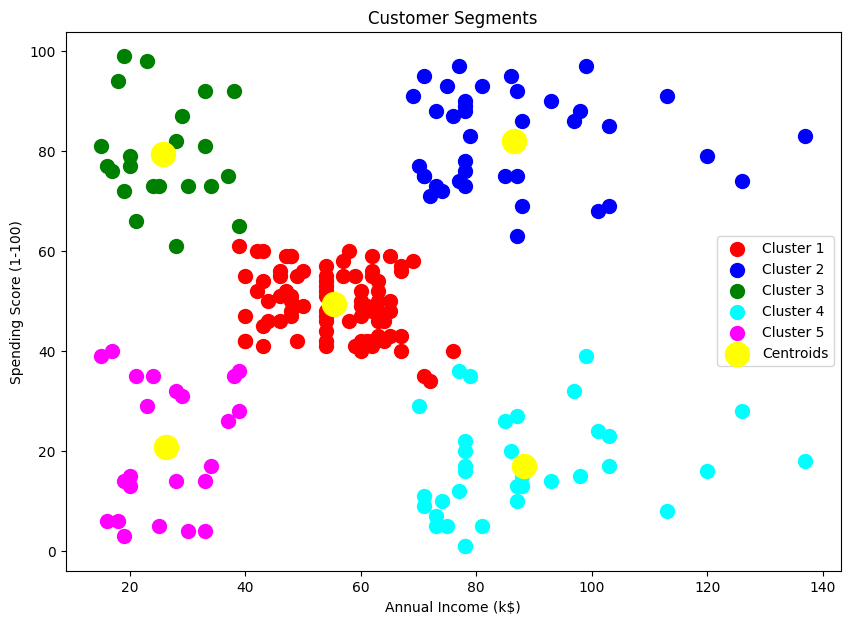

In [8]:
# Applying K-means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

# Adding the cluster results to the original data
data['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X.values[clusters == 0, 0], X.values[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[clusters == 1, 0], X.values[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[clusters == 2, 0], X.values[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[clusters == 3, 0], X.values[clusters == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[clusters == 4, 0], X.values[clusters == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
